<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

# 聚合（Aggregations）：最小值、最大值和其他值

当你面对大量的数据时，第一个步骤通常都是计算相关数据的概括统计值。

最“经典”的概括统计值包括是**均值**和**标准差**，是其他一些形式的聚合也是非常有用的（如**求和、乘积、中位数、最小值和最大值、分位数**，等等）。

NumPy有非常快速的**内置聚合函数**可用于数组，本节我们将介绍其中的一些。

## 数组值求和（sum）

若想计算一个数组中所有元素的和。可用**Python 本身内置的``sum``函数**实现：

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)#Return 100 random floats in the half-open interval [0.0, 1.0).
sum(L)

46.98960021546694

NumPy的``sum``函数与之非常相似，并且在这个简单的例子中的结果也是一样的：

In [3]:
np.sum(L)

46.98960021546696

但是，因为**NumPy的sum函数在编译码中执行操作，所以比python内置的sum更快一些**：

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)
%timeit np.add.reduce(big_array)

255 ms ± 5.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.32 ms ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.43 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


注意：``sum``函数和``np.sum``函数并不等同，这有时会导致混淆。

尤其是它们各自的可选参数都有不同的含义，``np.sum``函数是知道数组的维度的，这一点将在接下来的部分讲解。

## 最小值和最大值

同样，Python 也有内置的``min``函数和``max``函数，分别被用于获取给定数组的最小值和最大值：

In [5]:
min(big_array), max(big_array)

(1.1682128722156904e-06, 0.9999994851821933)

NumPy对应的函数也有类似的语法，并且也执行得更快：

In [6]:
np.min(big_array), np.max(big_array)

(1.1682128722156904e-06, 0.9999994851821933)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

172 ms ± 5.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.09 ms ± 25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


对于 ``min``, ``max``, ``sum``和其他 NumPy 聚合，一种更简洁的语法形式是**数组对象直接调用（推荐）**这些方法：

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

1.1682128722156904e-06 0.9999994851821933 500253.50447678234


当你操作 NumPy 数组时，确保你执行的是 NumPy 版本的聚合！

### 1. 多维度聚合

一种常用的聚合操作是沿着一行或一列聚合。例如，假设你有一些数据存储在二维数组中：

In [9]:
M = np.random.random((3, 4)) #random.random()生成0~1的随机浮点数
print(M)

[[0.05430048 0.61258859 0.12938402 0.06093397]
 [0.9482443  0.15531921 0.17581252 0.76837266]
 [0.49264697 0.46720659 0.6752106  0.73918336]]


默认情况下，每一个NumPy聚合函数将会返回对**整个数组**的聚合结果：

In [10]:
M.sum()

5.279203263858294

聚合函数还有一个参数，用于指定沿着哪个**轴**的方向进行聚合。例如，可以通过指定**``axis=0``(按列)**找到每一列的最小值：

In [11]:
M.min(axis=0)

array([0.05430048, 0.15531921, 0.12938402, 0.06093397])

同样，也可以找到每一行的最大值：

In [12]:
M.max(axis=1)

array([0.61258859, 0.9482443 , 0.73918336])

习惯使用其他编程语言的用户也许会对轴的指定方式比较困惑。

**注意**：``axis``关键字指定的是数组将会**被折叠**的维度，而不是将要返回的维度。因此指定``axis=0``意味着第一个轴（即：行）将要被折叠——对于二维数组，这意味着每一列的值都将被聚合。

### 2. 其他聚合函数

NumPy 提供了很多其他聚合函数，但是这里不会详细地介绍它们。

另外，大多数的聚合都有对``NaN``值（表示缺失值Not a Number，IEEE 浮点型）的安全处理策略（NaN-safe），即计算时忽略所有的缺失值。

下表提供了一个NumPy中可用的聚合函数的清单。

|函数名称           |   NaN-safe 版本     | 描述                                                                |
|-------------------|---------------------|---------------------------------------------------------------------|
| ``np.sum``        | ``np.nansum``       |计算元素的和（sum）                                                  |
| ``np.prod``       | ``np.nanprod``      |计算元素的积 (product)                                               |
| ``np.mean``       | ``np.nanmean``      | 计算元素的平均值(mean of elements)                                  |
| ``np.std``        | ``np.nanstd``       | 计算元素的标准差(standard deviation)                                |
| ``np.var``        | ``np.nanvar``       | 计算元素的方差(variance)                                            |
| ``np.min``        | ``np.nanmin``       | 找出最小值(minimum value)                                           |
| ``np.max``        | ``np.nanmax``       | 找出最大值(maximum value)                                           |
| ``np.argmin``     | ``np.nanargmin``    | 找出最小值的索引(index of minimum value)                            |
| ``np.argmax``     | ``np.nanargmax``    | 找出最大值的索引(index of maximum value)                            |
| ``np.median``     | ``np.nanmedian``    | 计算元素的中位数(median)                                            |
| ``np.percentile`` | ``np.nanpercentile``| 计算基于元素排序的统计值(rank-based statistics of elements)         |
| ``np.any``        | N/A                 | 验证任何一个元素是否为真(Evaluate whether any elements are true)    |
| ``np.all``        | N/A                 | 验证所有元素是否为真(Evaluate whether all elements are true)        |


## 一个例子： 中石化股价概览

用NumPy的聚合功能来概括一组数据非常有用。这里举一个例子——简单分析中石化在2011-2019年的日收盘价。

这个数据在data\中国石油化工日交易数据2011-2019.csv文件中，是一个简单的用逗号分隔的标签和值的列表：

我们将用Pandas包来读文件并提取收盘价Clsprc（注意：衡量一个股票的估值还需要看市盈率、市净率等指标）。第3章将更全面地介绍 Pandas：

In [24]:
import pandas as pd
data = pd.read_csv('data/中国石油化工日交易数据2011-2019.csv')
close_prices = np.array(data['Clsprc'])

有了这个数据数组后，我们就可以计算各种统计值了：

In [25]:
print("Mean price:        ", close_prices.mean())
print("Standard deviation:", close_prices.std())
print("Minimum price:    ", close_prices.min())
print("Maximum price:    ", close_prices.max())

Mean price:         5.870337078651685
Standard deviation: 0.9308201529355684
Minimum price:     4.1
Maximum price:     8.67


在这个例子中，聚合操作将整个数组缩减到单个概括值，这个概括值给出了这些数值的分布信息。我们也可以计算分位数：

In [26]:
print("25th percentile:   ", np.percentile(close_prices, 25))
print("Median:            ", np.median(close_prices))
print("75th percentile:   ", np.percentile(close_prices, 75))

25th percentile:    5.05
Median:             5.9
75th percentile:    6.52


当然，有些时候将数据可视化更有用。这时可以先进行一个快速的可视化，通过 Matplotlib（第 4 章将详细讨论）用以下代码创建下图：

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()  # 设置绘图风格
plt.rcParams['font.sans-serif'] = ['KaiTi']#Pandas matplotlib 画图无法显示中文字体的问题, https://blog.csdn.net/lvshu_yuan/article/details/80413005
plt.rcParams['font.serif'] = ['KaiTi']

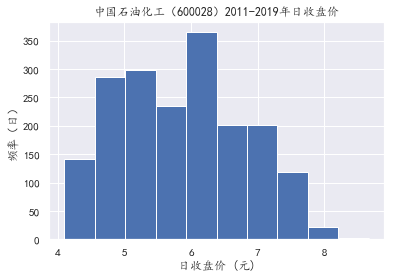

In [41]:
plt.hist(close_prices) #直方图
plt.title('中国石油化工（600028）2011-2019年日收盘价')
plt.xlabel('日收盘价 (元)')
plt.ylabel('频率（日）');

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >